# Student Information

- **Name**: Tazmeen Afroz  
- **Roll No**: 22P-9252  
- **Section**: BAI-6A  

# Task 3

**Note**: All question answers are provided at the end of this notebook code.

In [15]:
from pyspark import SparkConf, SparkContext

In [16]:
sc = SparkContext.getOrCreate();

In [17]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [18]:
x = [1,2,3,4,5,6,7,8,9,10,11,12];
xRDD = sc.parallelize(x);

In [19]:
print(type(x));
print(type(xRDD));

<class 'list'>
<class 'pyspark.rdd.RDD'>


In [20]:
xRDD.getNumPartitions()
print(xRDD.glom().collect())

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]


In [21]:
xRDD5 = sc.parallelize(x, 5);
xRDD5 = xRDD.repartition(5);

In [26]:
xRDDEven = xRDD.filter(lambda y: (y % 2 == 0) in x)
xRDDOdd = xRDD.filter(lambda y: (y % 2 == 1) in x)
xRDDUnion = xRDDEven.union(xRDDOdd)

In [27]:
print(xRDDUnion.glom().collect())

[Stage 5:====================================>                      (5 + 3) / 8]

[[2], [4, 6], [8], [10, 12], [1, 3], [5], [7, 9], [11]]


**Question 1: What is the URL of Spark UI installed on your machine?**
<br />
Answer: http://localhost:4040

**Question 2: What is the class type xRDD object and find the URL of the API documentation for this class type.**
<br />
<class 'pyspark.rdd.RDD'>
<br />
**Class type:** pyspark.rdd.RDD
<br />
**URL** https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.html

**Question 3: From the URL you have found, find what the function glom() does**
<br />


**glom()** returns a new RDD by applying list() to each partition, giving you a list of elements per partition.

<br />

**Question 4: What is the difference in output of:**

   **print(xRDD)**

   **print(xRDD.collect())**

   **print(xRDD.glom().collect())**
<br />

print(xRDD) — just prints the RDD object reference (won’t show actual data).

print(xRDD.collect()) — fetches and prints all elements in the RDD in a flat list.

print(xRDD.glom().collect()) — fetches all elements, but grouped by partition, so the output is a list of lists.
<br />

**Question 5: Parallelize an array of size 50. What is the default number of partitions?**


In [23]:
x50 = list(range(1, 51))
xRDD50 = sc.parallelize(x50)
xRDD50.getNumPartitions()

4

Default number of partitions = 4

 **Question 6: For array size 50, repartition it to 7 partitions. Check the composition.**

In [25]:
xRDD7 = xRDD50.repartition(7)
print(xRDD7.glom().collect())

[Stage 4:==========================================>                (5 + 2) / 7]

[[23, 24, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], [47, 48, 49, 50], [25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 35, 36], [11, 12], [], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]



partition 0 :[23, 24, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46] workload :12
<br/>
partition 1 : [47, 48, 49, 50] workload :4
<br/>
partition 2: [25, 26, 27, 28, 29, 30, 31, 32, 33, 34] workload : 10
<br/>
partition 3: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 35, 36] workload : 12
<br/>
partition 4: [11, 12] workload : 2
<br/>
partition 5: [] workload : 0
<br/>
partition 6: [13, 14, 15, 16, 17, 18, 19, 20, 21, 22] workload : 10
<br/>

<br/>


**Question 7: Comment on the execution order of partitions.**
</br>
Execution order of partitions is differ between runs. Spark executes tasks based on scheduling and available resources.so its execution is parallel instead of serial.

**Question 8: From the Spark UI, report the Job ID, Job description, and duration (in seconds) of the most time-consuming job.**
</br>
**JOB ID : 0 , DESCRIPTION :  	collect at /tmp/ipykernel_15336/2202592476.py:2  , DURATION : 3s**
</br>
</br>
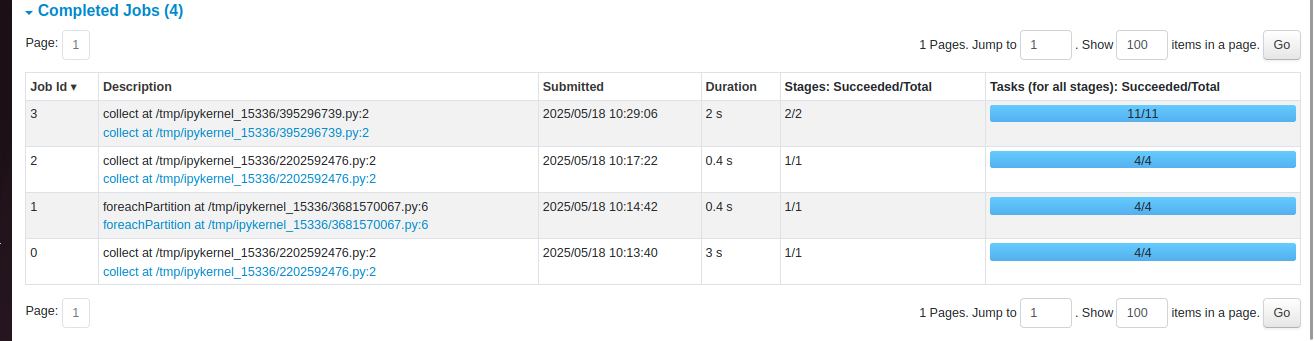

 **Question 9: From the Spark UI, present the Directed Acyclic Graph (DAG) for your foreachPartition() code.**
</br>
 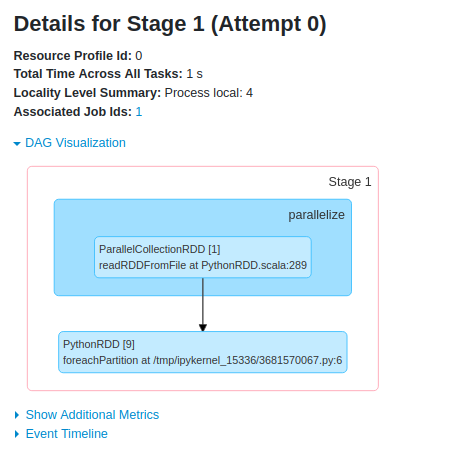
 

**Question 10: Explain what a stage is and how it is numbered.**

A stage in Spark represents a set of tasks that can be executed in parallel without requiring a shuffle (data exchange) across nodes or partitions. Each stage corresponds to a portion of the RDD’s computation graph (DAG) that can be computed independently until a shuffle boundary is encountered ( operations like groupBy, join, or repartition that require data redistribution).
In the above case, the foreachPartition() operation does not involve a shuffle because it applies a function to each partition locally. This results in a single stage (Stage 1) where all tasks (one per partition) can be executed concurrently on the available resources.


</br>
Stages are numbered sequentially starting from 0 based on their execution order in the DAG. The numbering reflects the order in which Spark schedules and executes the stages during job processing

**Question 11. From the Spark UI, report the Directed Acyclic Graph visualization for the Union() code.Report which partition is executed on which machine.**

</br>

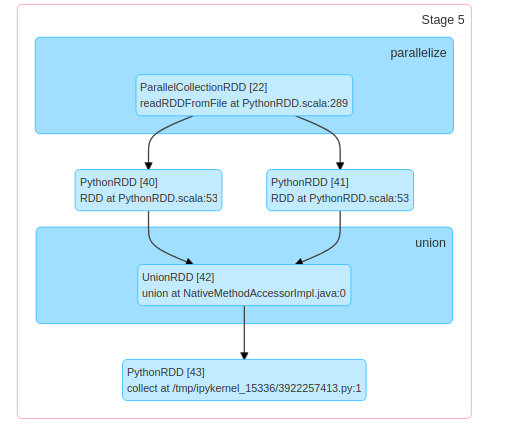


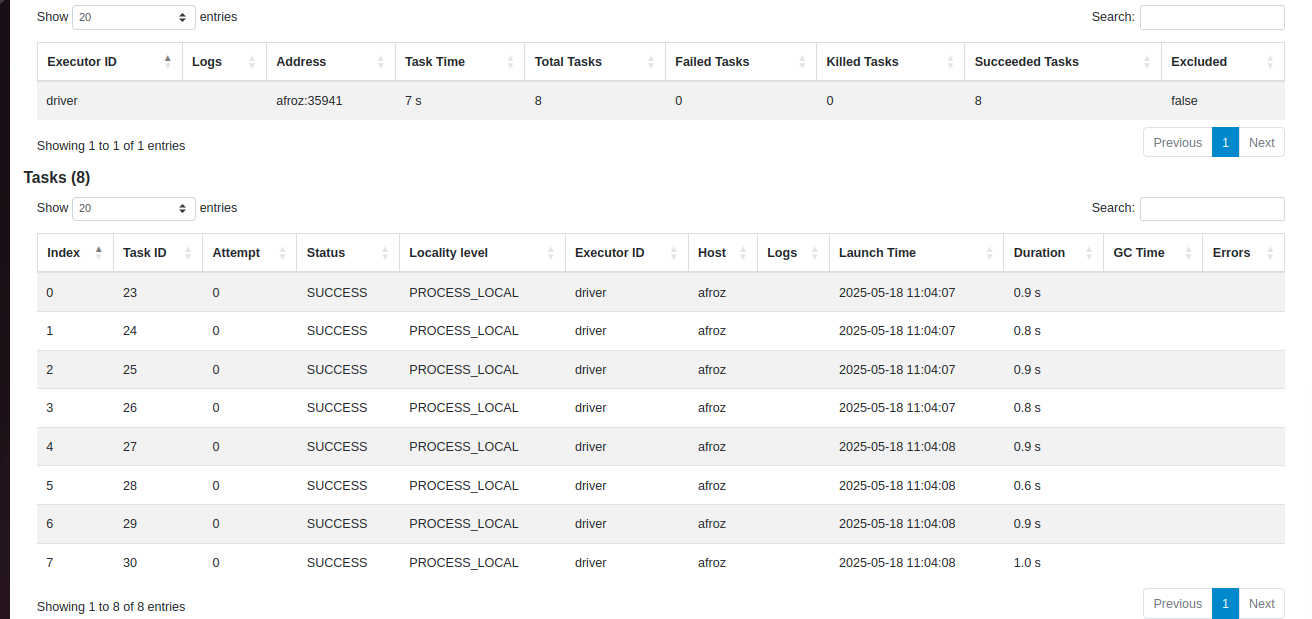

The DAG visualization for the union() code (Stage 5) consists of the following flow:

    ParallelCollectionRDD[22] (source RDD) splits into:
        PythonRDD[40] (filter for even numbers).
        PythonRDD[41] (filter for odd numbers).
    These converge into UnionRDD[42] (via union).
    Followed by PythonRDD[43] (via collect).

This represents a three-step process where the initial RDD is filtered into even and odd RDDs, united, and then collected, all within a single stage due to the absence of shuffle operations.

All 8 partitions of xRDDUnion are executed on the machine afroz (my local machine hdoop@afroz), as Spark is running in local mode (local[*]). The tasks (Task IDs 23, 24, 25, 26, 27, 28, 29, 30) are all processed by the driver executor with a PROCESS_LOCAL locality level, indicating no distribution across multiple machines.